<a href="https://colab.research.google.com/github/1vad1mka/hse_assignments/blob/main/%22%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D1%82%D0%B5%D1%81%D1%82%2C_%D0%98%D0%98%2C_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_6_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Часть 1. Парсинг (10 баллов)

Мы предлагаем вам распарсить часть данных litres.ru — а именно часть про книги, имеющие отношение к программированию.

Они находятся в этом каталоге: https://www.litres.ru/genre/programmirovanie-5272/

Вам нужно собрать датасет о книгах с первых 40-ти страниц каталога (около 960 книг.)
*Подсказка.* Можете начать с исследования html кода этой страницы.

Вам необходимо собрать датасет, содержащий следующие данные:
* name: название книги
* author: автор
* link: ссылка на книгу
* rating: рейтинг по 5-балльной шкале
* rating_count: количество оценок
* review_count: количество отзывов
* pages_count: объем (число страниц)
* price: цена
* text_reviews: тексты отзывов: список строк
* age: возрастное ограничение
* year: год написания

В дальнейшем вам нужно будет анализировать полученный у вас датасет.

Если у вас не получилось спарсить датасет, воспользуйтесь для последующих пунктов готовым датасетом: https://disk.yandex.ru/d/2UZet2-qxRxF6Q

 Так вы сможете получить баллы за вторую часть.

(Датасет неидеален, с ним придется поработать!)

**Парсите "вежливо": используйте time.sleep() не меньше 1-2 секунд между запросами к сайту!**

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
print('Нет настолько хорошего опыта в парсинге :(')

Нет настолько хорошего опыта в парсинге :(


## Часть 2. EDA (30 баллов)

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?
2. Есть ли в датасете пропуски? (0.5)
3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).
4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

8. Выведите топ-10 книг по числу отзывов. (2).

9. Найдите среднюю длину отзыва (в символах). (2)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

In [3]:
# Понадобится для корреляции
!pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.3 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik

# Подсмотрел на stackoverflow
from ast import literal_eval

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Задание 1

In [5]:
data = pd.read_csv('/content/drive/MyDrive/litres_programming_data.csv')

In [6]:
def df_info(data):
  print('Количество строк в данных - ', data.shape[0])
  print('Количество столбцов в данных - ', data.shape[1])
  print()
  display(data.head())
  return data.info()

In [7]:
df_info(data)

Количество строк в данных -  965
Количество столбцов в данных -  13



,Unnamed: 0,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
2,3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
3,4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
4,7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       965 non-null    int64  
 1   name             965 non-null    object 
 2   author           965 non-null    object 
 3   link             965 non-null    object 
 4   rating           965 non-null    float64
 5   rating_count     965 non-null    int64  
 6   review_count     965 non-null    int64  
 7   price            965 non-null    float64
 8   pages            965 non-null    object 
 9   pages_count      965 non-null    int64  
 10  text_of_reviews  965 non-null    object 
 11  age              965 non-null    object 
 12  year             965 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 98.1+ KB


Количество строк в данных -  965
Количество столбцов в данных -  13 (1 столбец с индексами. Его лучше удалить)

In [8]:
data = data.drop(['Unnamed: 0'], axis=1)
data.columns

Index(['name', 'author', 'link', 'rating', 'rating_count', 'review_count',
       'price', 'pages', 'pages_count', 'text_of_reviews', 'age', 'year'],
      dtype='object')

### Задание 2

Из предыдущего задания видно, что пропусков нет. Но я проверю еще раз.

In [9]:
data.isna().sum()

,0
name,0
author,0
link,0
rating,0
rating_count,0
review_count,0
price,0
pages,0
pages_count,0
text_of_reviews,0


Пропусков не видно.

### Задание 3.

Проверка типов данных и конвертация.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             965 non-null    object 
 1   author           965 non-null    object 
 2   link             965 non-null    object 
 3   rating           965 non-null    float64
 4   rating_count     965 non-null    int64  
 5   review_count     965 non-null    int64  
 6   price            965 non-null    float64
 7   pages            965 non-null    object 
 8   pages_count      965 non-null    int64  
 9   text_of_reviews  965 non-null    object 
 10  age              965 non-null    object 
 11  year             965 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 90.6+ KB


Можно немного предобработаь `pages`, оставив там только номера страниц. Не знаю, нужно ли это делать, учитывая наличие столбца `pages_count`, который и является искомым столбцом. Преобразовывать не буду. Признак `age` - категориальный с очень ограниченым число категорий. Вряд ли есть смысл его приводить к числовому типу.

In [11]:
data.age.value_counts()

,count
age,
0+,622
12+,177
16+,144
6+,16
18+,6


### Задание 4

Выведите описательные статистики переменных.


Ответьте на следующие вопросы:
- Какая медианная цена книги в вашем датасете? (1)
- Какое возрастное ограничение встречается чаще всего? (1)
- Какое среднее число отзывов в книге? (1)
- Сколько книг имеют оценку ниже 4.25? (1)
- В каком году было написано больше всего книг из датасета? (1)

In [12]:
data.describe()

,rating,rating_count,review_count,price,pages_count,year
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,2.543420,10.338860,1.603109,348.744021,222.014508,2016.327461
std,2.193727,36.058249,3.134103,279.907683,236.922129,5.646624
min,0.000000,0.000000,0.000000,40.000000,2.000000,1985.000000
25%,0.000000,0.000000,0.000000,129.000000,12.000000,2012.000000
50%,3.600000,1.000000,0.000000,200.000000,163.000000,2017.000000
75%,4.600000,6.000000,2.000000,549.000000,362.000000,2021.000000
max,5.000000,433.000000,37.000000,2200.000000,1223.000000,2024.000000


In [13]:
# Медианная цена книги
print('Медианная цена книги - ', data.price.median())
# Мода возрастного ограничения
print('Самая частая возрастная категория - ', data.age.mode()[0])
# Среднее число отзывов (из таблицы выше)
print('Среднее число отзывов - ', 1.603109)
# Книги с оценкой < 4.25
print('Число книг с рейтингом < 4.25 равно - ', data.query('rating < 4.25').shape[0])
# Год из таблицы ниже
print('Самый распространенный год написания книг - ', 2021, '(91 книга)')


Медианная цена книги -  200.0
Самая частая возрастная категория -  0+
Среднее число отзывов -  1.603109
Число книг с рейтингом < 4.25 равно -  619
Самый распространенный год написания книг -  2021 (91 книга)


In [14]:
data.groupby('year')['name'].count().sort_values(ascending=False).iloc[:5]

,name
year,
2021,91
2023,85
2022,71
2020,68
2013,60


### Задание 5
Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)


In [15]:
data.pages.value_counts()

,count
pages,
8 стр.,42
11 стр.,38
9 стр.,34
7 стр.,31
10 стр.,29
...,...
489 стр.,1
619 стр.,1
24 стр.,1


In [16]:
# Извлекаем количество страниц
data['pages_counts_new'] = data.pages.str.extract('(\d+)').astype('int')
data['pages_counts_new'].head(5)

,pages_counts_new
0,102
1,831
2,130
3,10
4,166


### Задание 6.
Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

In [17]:
def filter_func(row):
  if (row['rating'] >= 4.6) and (row['review_count'] >= 5):
    return 1
  else:
    return 0

In [18]:
data['is_popular'] = data.apply(filter_func, axis=1)
data['is_popular'].value_counts()

,count
is_popular,
0,933
1,32


### Задание 7.
Как отличается среднее число страниц среди популярных и непопулярных книг? (2)



In [19]:
data.groupby('is_popular')['pages_counts_new'].mean()

,pages_counts_new
is_popular,
0,216.564845
1,380.906250


Среднее число страниц у популярных книг больше - 380 по сравнению с 216.

### Задание 8.
Выведите топ-10 книг по числу отзывов. (2).


In [20]:
data.sort_values('review_count', ascending=False).iloc[:10]

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,pages_counts_new,is_popular
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023,102,1
775,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,599.0,224 стр.,224,['Прекрасная книга. Рекомендовал и старшим шко...,16+,2017,224,0
98,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,299.0,210 стр.,210,"['Отличная книга чтобы начать программировать,...",12+,2017,210,0
692,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,377,19,690.0,231 стр. 20 иллюстраций,231,['Отличная серия! Обложки просто кайф. Много п...,12+,2023,231,1
494,"Изучаем Python: программирование игр, визуализ...",Эрик Мэтиз,https://www.litres.ru/book/erik-metiz/izuchaem...,4.3,74,18,699.0,512 стр.,512,"['Осторожно, под видом второго издания продает...",16+,2021,512,0
528,"Swift. Основы разработки приложений под iOS, i...",Василий Усов,https://www.litres.ru/book/vasiliy-usov/swift-...,3.1,64,17,499.0,545 стр.,545,['Книга хорошая. Все подробно описано. Единств...,16+,2021,545,0
89,Облачные технологии. Практическое руководство ...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/oblac...,5.0,268,17,690.0,212 стр. 5 иллюстраций,212,['Автор не перестает радовать годными книгами....,12+,2024,212,1
458,Путь лидера,Джейд Картер,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,173,17,199.0,215 стр. 10 иллюстраций,215,['Отличное руководство. Расписан каждый шаг. Д...,12+,2023,215,1
481,Программирование на C++ в примерах и задачах,Алексей Васильев,https://www.litres.ru/book/aleksey-nikolaevich...,4.0,78,16,419.0,369 стр.,369,"['Я купил эту книгу в бумажном виде, прочитав ...",12+,2017,369,0
947,1С:Программирование для начинающих. Детям и ро...,м. г. радченко,https://www.litres.ru/book/m-g-radchenko/1s-pr...,4.0,64,15,550.0,781 стр.,781,['Эту книгу я бы рекомендовала самой первой к ...,12+,2022,781,0


В таблице выше топ 10 книг по числу отзывов.

### Задание 9.
Найдите среднюю длину отзыва (в символах). (2)

In [21]:
def mean_symbols_num(x):
  # Конвертируем строку-список в простой список (подсмотрел на stackoverflow)
  x = literal_eval(x)

  # Чтобы не было пропусков: если лист пустой, то ответ - 0
  if len(x) == 0:
    return 0

  # Сохраняем длину каждого отзыва для каждой книги
  temp_result = []
  # Итерируем по списку с отзывыми и считаем число символов
  for review in x:
    temp_result.append(len(review))

  temp_result = pd.Series(temp_result)
  return temp_result.mean()


In [22]:
# Добавляем признак со средней длинной отзыва - 'mean_review_len'
data['mean_review_len'] = data['text_of_reviews'].apply(mean_symbols_num)
data.head(3)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,pages_counts_new,is_popular,mean_review_len
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023,102,1,243.166667
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023,831,0,83.000000
2,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019,130,0,138.666667


Нашел среднюю длину отзывов в символах. Добавил соотвутствущий признак.

### Задание 10.
Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)


Вначале корреляция с помощью `phik_matrix`: позволяет включать категориальные признаки, а также искать нелинейные связи.

Не имеет смысл искать корреляцию признаков с огромным числом категорий типа `text_of_reviews`, `link`, `pages`, `name`, `author`.

In [23]:
sns.set_theme(rc={'figure.figsize':(11, 11)})

CPU times: user 521 ms, sys: 122 ms, total: 643 ms
Wall time: 4.58 s


<Axes: >

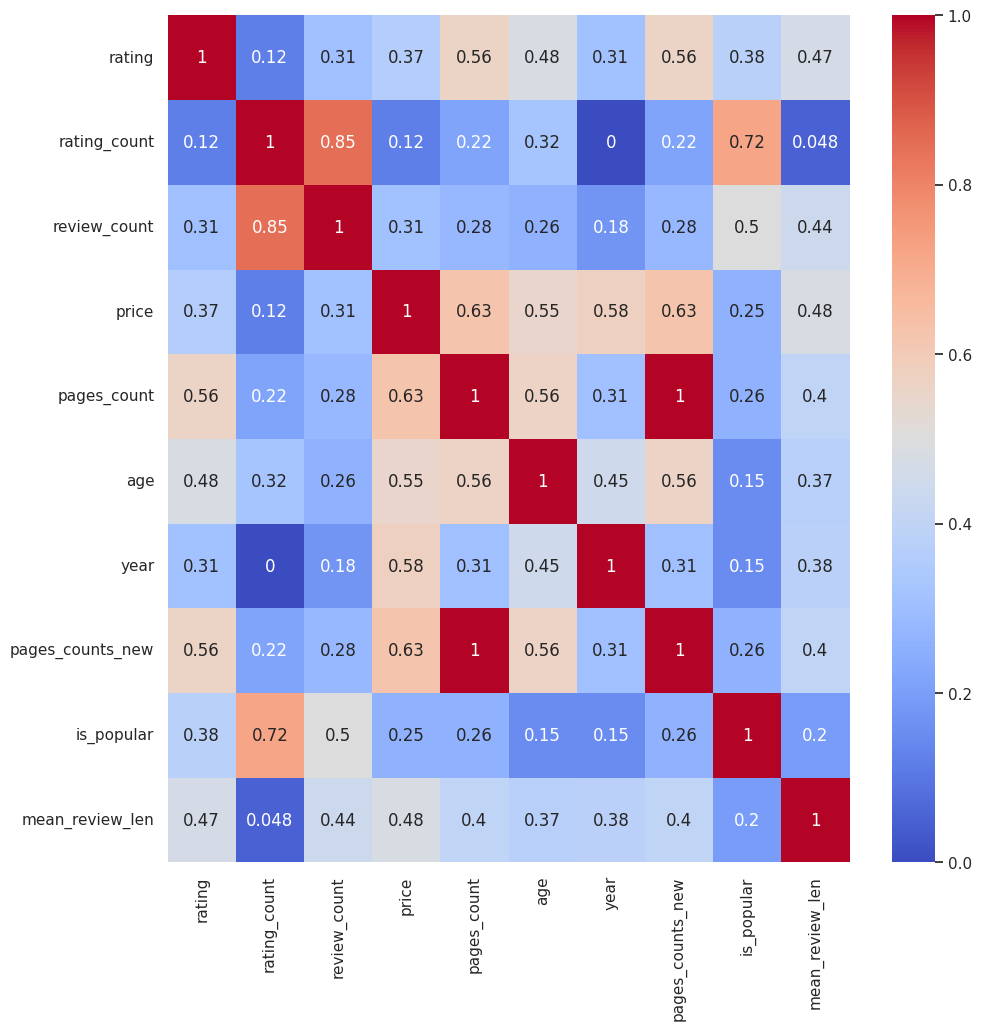

In [24]:
%%time
corr_phik = data.drop(['text_of_reviews', 'link', 'pages', 'name', 'author'], axis=1)\
                                              .phik_matrix(interval_cols=['rating', 'rating_count', 'review_count', 'price', 'pages_count',
                                                              'year', 'pages_counts_new', 'is_popular', 'mean_review_len'])
sns.heatmap(corr_phik, annot=True, cmap="coolwarm");

Краткая интерпретация результатов:
  - `rating`: достаточно большая корреляция с `pages_count` (чем больше кол-во страниц, тем выше рейтинг);
  - `rating_count`: сильная корреляция с `review_count` и `is_popular` (чем больше оценок, тем больше отзывов и тем популярнее книга, что очевидно);
  - `price`: чем больше количество страниц, тем выше цена; таже видна зависимость с годом и возрастной группой.
  - `age`: возрастная группа определяет количество страниц, а также цену.

CPU times: user 323 ms, sys: 55.8 ms, total: 379 ms
Wall time: 927 ms


<Axes: >

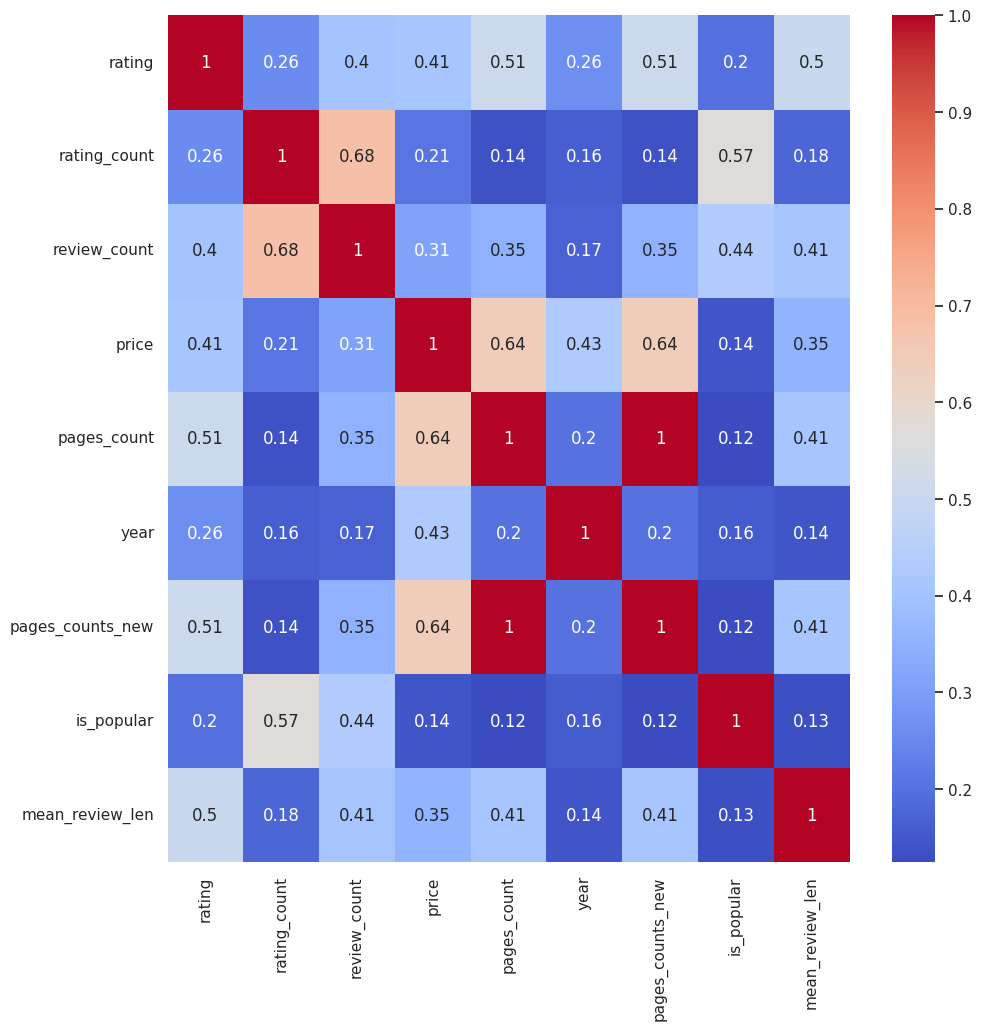

In [25]:
%%time
corr_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm");

Интерпретация выше уместна и здесь. Разница: эта корреляционная матрица улавливает только линейные связи. Эту корреляционную матрицу оставлю для вида. Есть 2 одинаковых признака. Как результат - мультиколлинеарность (лучше удалить).

### Задание 11.
Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)


In [26]:
sns.set_theme(rc={'figure.figsize':(10, 5)})

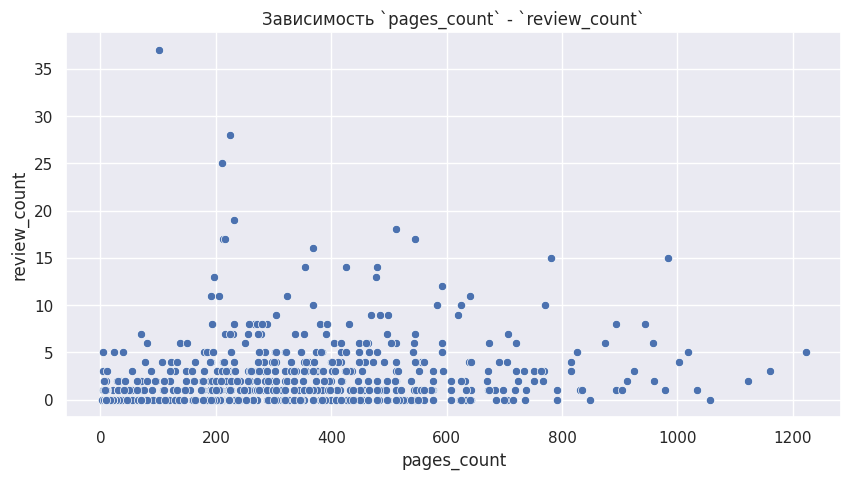

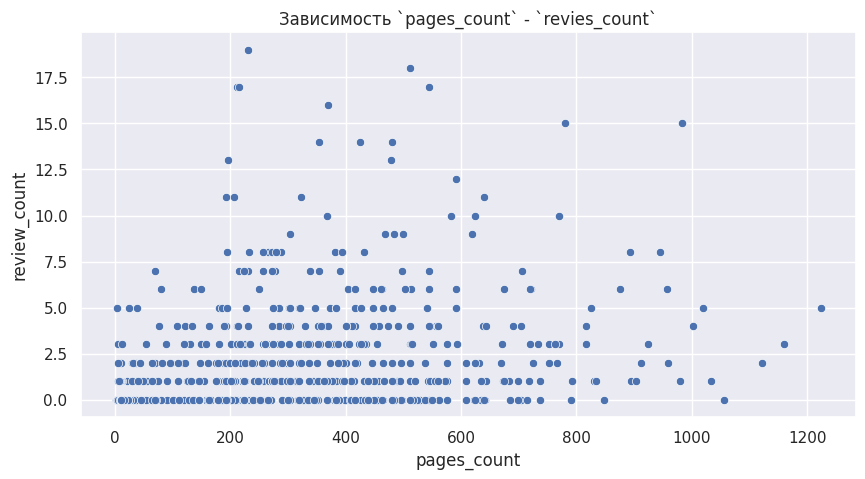

In [27]:
sns.scatterplot(data=data, x='pages_count', y='review_count');
plt.title('Зависимость `pages_count` - `review_count`')
plt.show()

sns.scatterplot(data=data.query('review_count <= 20'), x='pages_count', y='review_count');
plt.title('Зависимость `pages_count` - `revies_count`')
plt.show()


Как видно из корреляционной таблицы и графика рассеивания, между этими 2 признаками нет сильной линейной зависимость. Также есть выбросы (2 график без сильных выбросов).

### Задание 12.
Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)



In [28]:
books_count_year = data.groupby('year')['name'].count().reset_index()
books_count_year.head(4)

,year,name
0,1985,2
1,1995,2
2,2000,2
3,2002,1


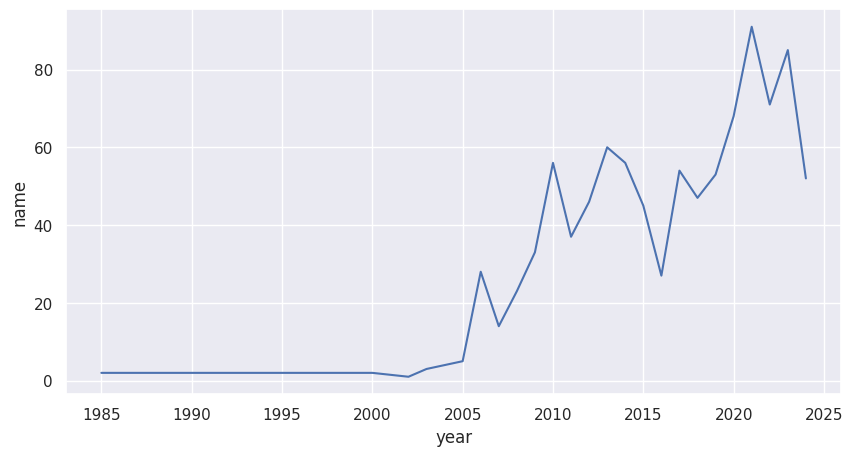

In [29]:
sns.lineplot(data=books_count_year, x='year', y='name');

Из графика видно, что большая часть продаваемых книг написана после $2000$ года. Чаще всего книги написаны в интервале $[2020, 2023]$.

### Задание 13.
Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

Рассмотрим частоту встречаемости возрастных групп:

In [30]:
data.groupby('age')['name'].count().reset_index()

,age,name
0,0+,622
1,12+,177
2,16+,144
3,18+,6
4,6+,16


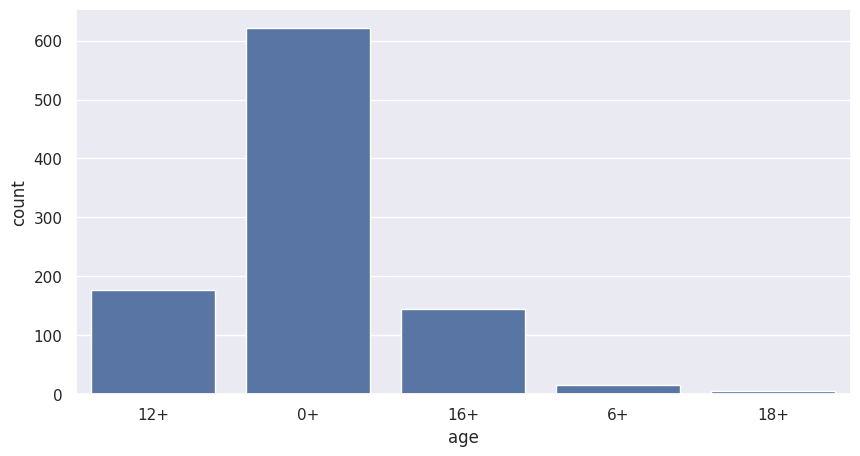

In [31]:
sns.countplot(data=data, x='age');

Как видно из графика, чаще всего книги по программированию не имеют никаких ограничений по возрасту. Почти все ограничения менее 18+.


Рассмотрим другой разброс цен на книги.

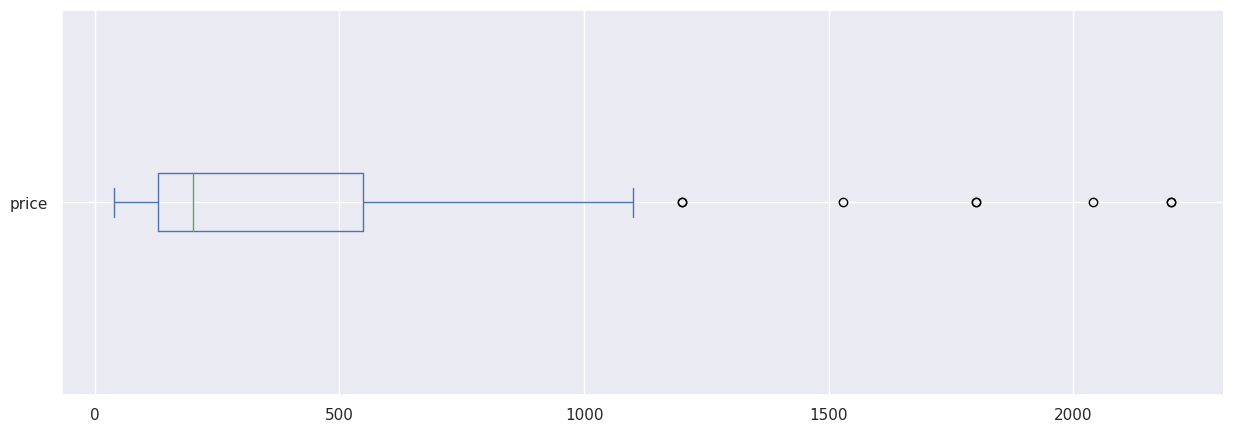

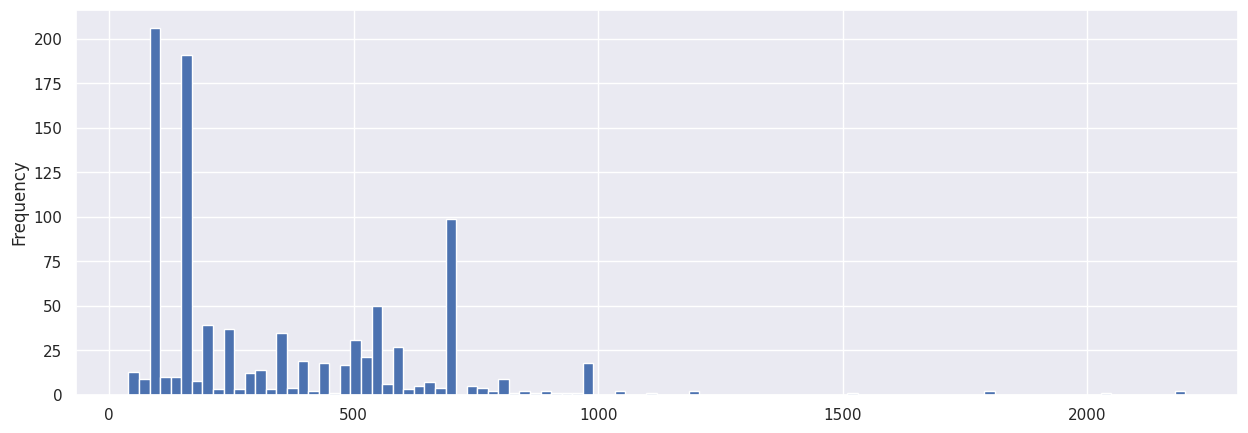

In [32]:
sns.set_theme(rc={'figure.figsize':(15, 5)})
data.price.plot(kind='box', vert=False);
plt.show()

data.price.plot(kind='hist', bins=100);

Распределение ненормально, ассиметрично. Есть значительные выбросы. Медиана цены около $200$.

### Задание 14.
Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

In [33]:
author_data = data.groupby('author').agg({'name': 'count', 'rating': 'mean', 'review_count': 'mean'}).reset_index()
author_data = author_data.rename({'name': 'amount_books'})
author_data.head(4)

,author,name,rating,review_count
0,Arsen Gonian,1,5.0,1.0
1,C. И. Никишов,1,4.7,3.0
2,Eugeny Shtoltc,2,2.5,0.0
3,Jade Carter,1,0.0,0.0


Таблица построена.

### Задание 15.
Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

Рассмотрим динамику средних цен на книги по годам.

In [37]:
year_prices = data.groupby('year')['price'].mean().reset_index()
year_prices.head(3)

,year,price
0,1985,266.0
1,1995,599.0
2,2000,64.0


Text(0.5, 1.0, 'Динамика средней цены на книги по годам')

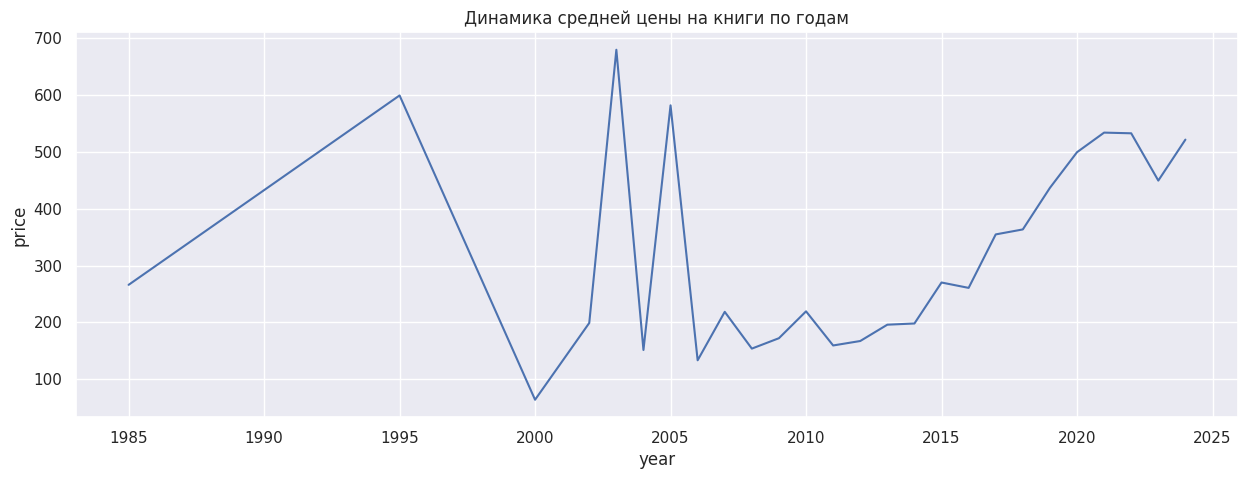

In [40]:
sns.lineplot(data=year_prices, x='year', y='price');
plt.title('Динамика средней цены на книги по годам')

Из рисунка видно, что своего минимума цены на книги по программированию достигли в $2000$ году. Своего пика - около $2003$ или $2004$ гг. Затем произошло сильное снижение, которое востанавливается в $2005$ - $2025$ гг.


Рассмотрим также совокупное количество отзывов по годам.

In [41]:
year_reviews_num = data.groupby('year')['review_count'].sum().reset_index()
year_reviews_num.head(3)

,year,review_count
0,1985,7
1,1995,16
2,2000,4


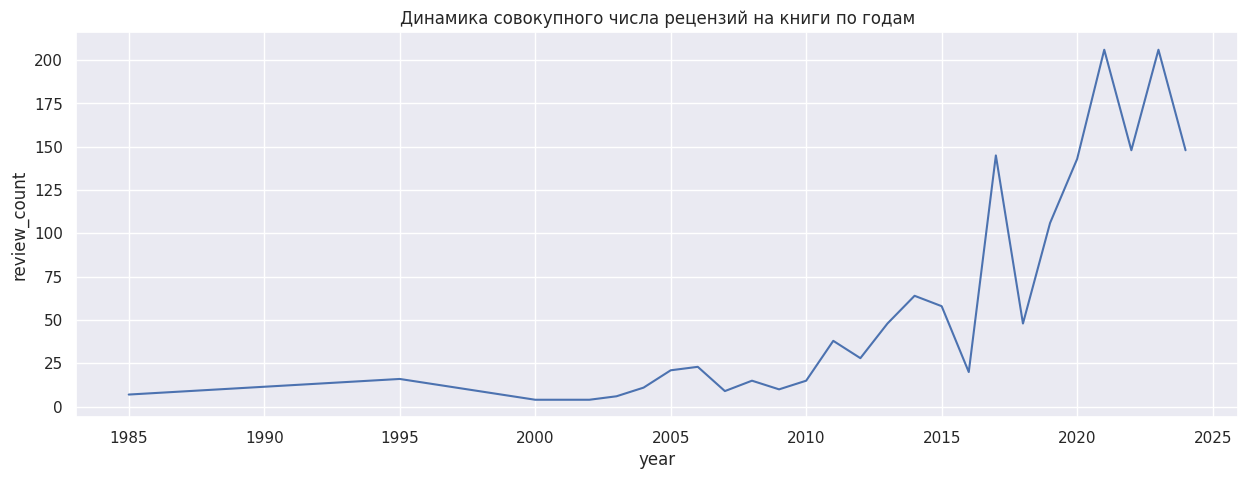

In [43]:
sns.lineplot(data=year_reviews_num, x='year', y='review_count');
plt.title('Динамика совокупного числа рецензий на книги по годам');

Согласно данным, совокупное число отзывов начало расти с 2015 года. Это может свидетельствовать либо о том, что у нас недостаточно данных за предыдущие года, либо о росте интереса к ИТ-сфере со стороны потребителей.

In [35]:
data[['name', 'price']].sort_values(by='price', ascending=False).head(10)

,name,price
301,Язык программирования С. Лекции и упражнения,2200.0
312,Spring 5 для профессионалов,2200.0
785,Программируем PLC,2040.0
688,Шаблоны корпоративных приложений,1800.0
347,Scrum: гибкая разработка ПО,1800.0
930,Машинное обучение (pdf+epub),1529.0
306,Программирование. Принципы и практика использо...,1200.0
614,Шаблоны тестирования xUnit: рефакторинг кода т...,1200.0
547,Использование языка Python в теории вероятностей,1100.0
801,Программирование на языке Rust,1049.0


В данных не дана страна издания книги, но если посмотреть на топ 10 авторов по средней цене книги, то большая часть этих авторов имеет иностранные имена, что может намекать на большую развитость IT-литературы зарубежом.

Найдем также авторов, написавших самые популярные книги.

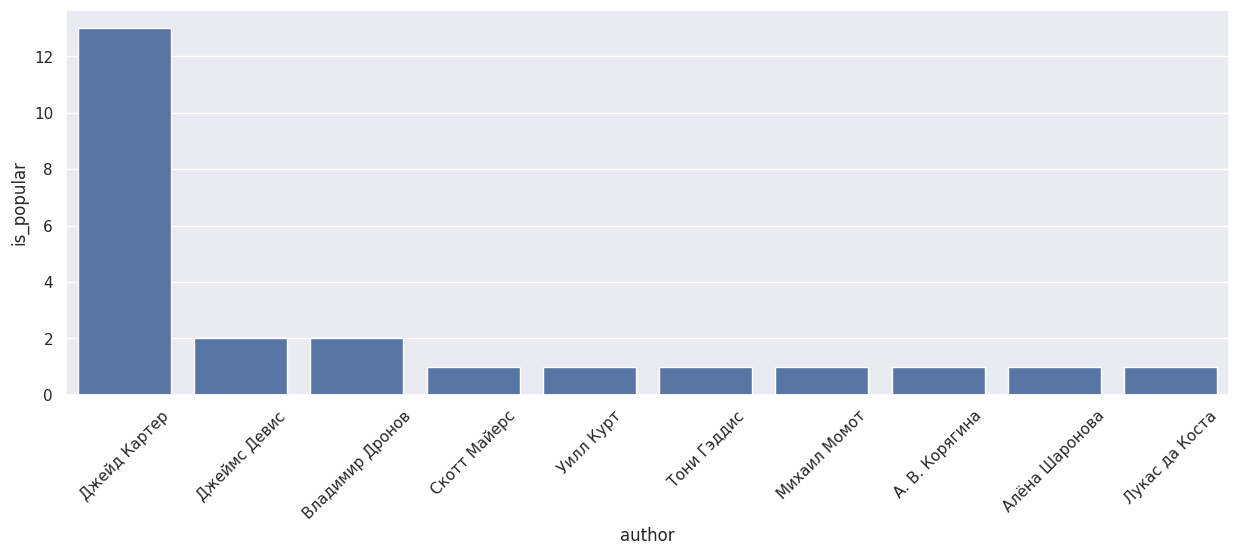

In [51]:
top10_best_authors = data.groupby('author')['is_popular'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=top10_best_authors, x='author', y='is_popular');
plt.xticks(rotation=45);

Их графика видно, что самым популярным писателем является Джейд Картер.